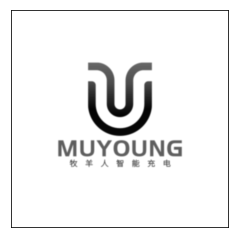

In [54]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('LOGO.png',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [11]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
  # Capture frame-by-frame
  ret, frame = cap.read()

  # Our operations on the frame come here
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Display the resulting frame
  cv2.imshow('frame',gray)
  if cv2.waitKey(1) & 0xFF == ord('q'):
     break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [17]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
   ret, frame = cap.read()
   if ret==True:
      frame = cv2.flip(frame,0)

      # write the flipped frame
      out.write(frame)

      cv2.imshow('frame',frame)
      if cv2.waitKey(1) & 0xFF == ord('q'):
         break
   else:
         break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [22]:
import numpy as np
import cv2
# Create a black image
img=np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts=np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts=pts.reshape((-1,1,2))
# 这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2)
winname = 'example'
cv2.namedWindow(winname)
cv2.imshow(winname, img)
cv2.waitKey(0)
cv2.destroyWindow(winname) 

In [29]:
import cv2
import numpy as np
#mouse callback function
def draw_circle(event,x,y,flags,param):
   if event==cv2.EVENT_LBUTTONDBLCLK:
     cv2.circle(img,(x,y),100,(255,0,0),-1)
# 创建图像与窗口并将窗口与回调函数绑定
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
   cv2.imshow('image',img)
   if cv2.waitKey(1) & 0xFF == ord('q'):
      break
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
# 当鼠标按下时变为 True
drawing=False
# 如果 mode 为 true 绘制矩形。按下'm' 变成绘制曲线。
mode=True
ix,iy=-1,-1
# 创建回调函数
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    # 当按下左键是返回起始位置坐标
    if event==cv2.EVENT_LBUTTONDOWN:
      drawing=True
      ix,iy=x,y
      # 当鼠标左键按下并移动是绘制图形。 event 可以查看移动， flag 查看是否按下
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
       if drawing==True:
           if mode==True:
              cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
           else:
           # 绘制圆圈，小圆点连在一起就成了线， 3 代表了笔画的粗细
              cv2.circle(img,(x,y),3,(0,0,255),-1)
# 下面注释掉的代码是起始点为圆心，起点到终点为半径的
              #r=int(np.sqrt((x-ix)**2+(y-iy)**2))
              #cv2.circle(img,(x,y),r,(0,0,255),-1)
# 当鼠标松开停止绘画。
    elif event==cv2.EVENT_LBUTTONUP:
         drawing==False
# if mode==True:
# cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
# else:
# cv2.circle(img,(x,y),5,(0,0,255),-1)
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF
    if k==ord('m'):
       mode=not mode
    elif cv2.waitKey(1) & k == ord('q'):
        break

In [2]:
import cv2
import numpy as np
def nothing(x):
    pass
# 创建一副黑色图像
img=np.zeros((300,512,3),np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
switch='0:OFF\n1:ON'
cv2.createTrackbar(switch,'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF
    if k==ord('q'):
         break
    r=cv2.getTrackbarPos('R','image')
    g=cv2.getTrackbarPos('G','image')
    b=cv2.getTrackbarPos('B','image')
    s=cv2.getTrackbarPos(switch,'image')
    if s==0:
       img[:]=0
    else:
       img[:]=[b,g,r]
cv2.destroyAllWindows() 

In [4]:
import cv2
import numpy as np
def nothing(x):
    pass
# 当鼠标按下时变为 True
drawing=False
# 如果 mode 为 true 绘制矩形。按下'm' 变成绘制曲线。
mode=True
ix,iy=-1,-1
# 创建回调函数
def draw_circle(event,x,y,flags,param):
   r=cv2.getTrackbarPos('R','image')
   g=cv2.getTrackbarPos('G','image')
   b=cv2.getTrackbarPos('B','image')
   color=(b,g,r)
   global ix,iy,drawing,mode
# 当按下左键是返回起始位置坐标
   if event==cv2.EVENT_LBUTTONDOWN:
      drawing=True
      ix,iy=x,y
# 当鼠标左键按下并移动是绘制图形。 event 可以查看移动， flag 查看是否按下
   elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
        if drawing==True:
           if mode==True:
             cv2.rectangle(img,(ix,iy),(x,y),color,-1)
           else:
# 绘制圆圈，小圆点连在一起就成了线， 3 代表了笔画的粗细
            cv2.circle(img,(x,y),3,color,-1)
# 下面注释掉的代码是起始点为圆心，起点到终点为半径的
# r=int(np.sqrt((x-ix)**2+(y-iy)**2))
# cv2.circle(img,(x,y),r,(0,0,255),-1)
# 当鼠标松开停止绘画。
   elif event==cv2.EVENT_LBUTTONUP:
         drawing==False
# if mode==True:
# cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
# else:
# cv2.circle(img,(x,y),5,(0,0,255),-1)
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
cv2.setMouseCallback('image',draw_circle)
while(1):
   cv2.imshow('image',img)
   k=cv2.waitKey(1)&0xFF
   if k==ord('m'):
      mode=not mode
   elif k==ord('q'):
      break

In [1]:
import cv2
import numpy as np
img=cv2.imread('LOGO.png')
px=img[100,100]
print(px)
blue=img[100,100,0]
print(blue)
## [57 63 68]
## 57
img[100,100]=[255,255,255]
print(img[100,100])
## [255 255 255]
print(img.item(10,10,2))
img.itemset((10,10,2),100)
print(img.item(10,10,2))
## 50
## 100
print(img.shape)
## (500, 500, 3)
print(img.size)
#750000
print(img.dtype)
## uint8
ball=img[200:420,130:490]
img[173:393,100:460]=ball#移动物体位置，实现复制
cv2.imshow('image',img)

[255 255 255]
255
[255 255 255]
255
100
(500, 500, 3)
750000
uint8


In [19]:
import cv2
import numpy as np
cap=cv2.VideoCapture(0)
while(1):
  # 获取每一帧
  ret,frame=cap.read()
  # 转换到 HSV
  hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
  # 设定蓝色的阈值
  lower_blue=np.array([110,50,50])
  upper_blue=np.array([130,255,255])
  # 根据阈值构建掩模
  mask=cv2.inRange(hsv,lower_blue,upper_blue)
  # 对原图像和掩模进行位运算
  res=cv2.bitwise_and(frame,frame,mask=mask)
  # 显示图像
  cv2.imshow('frame',frame)
  cv2.imshow('mask',mask)
  cv2.imshow('res',res)
  k=cv2.waitKey(5)&0xFF
  if k==ord('q'):
     break
# 关闭窗口
cv2.destroyAllWindows()

error: OpenCV(4.1.2) D:\Build\OpenCV\opencv-4.1.2\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


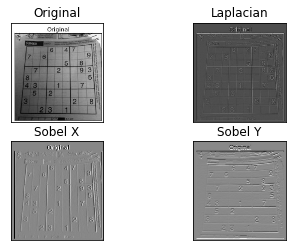

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('tidu.png',0)
#cv2.CV_64F 输出图像的深度（数据类型），可以使用-1, 与原图像保持一致 np.uint8
laplacian=cv2.Laplacian(img,cv2.CV_64F)
# 参数 1,0 为只在 x 方向求一阶导数，最大可以求 2 阶导数。
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
# 参数 0,1 为只在 y 方向求一阶导数，最大可以求 2 阶导数。
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'AxesImage'

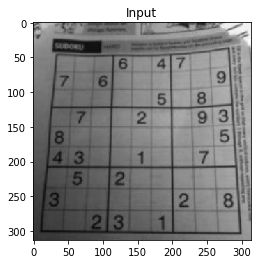

In [21]:
img=cv2.imread('tidu.png')
rows,cols,ch=img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M=cv2.getPerspectiveTransform(pts1,pts2)
dst=cv2.warpPerspective(img,M,(300,300))
plt.subplot(121,plt.imshow(img),plt.title('Input'))
plt.subplot(121,plt.imshow(img),plt.title('Output'))
plt.show()

D:\Program Files (x86)\anaconda\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


TypeError: int() argument must be a string, a bytes-like object or a number, not 'AxesImage'

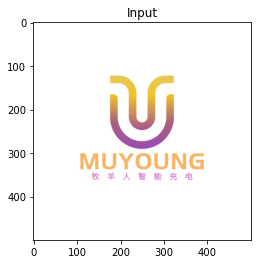

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('LOGO.png')
rows,cols,ch=img.shape
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[200,50],[100,250]])
M=cv2.getAffineTransform(pts1,pts2)
dst=cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121,plt.imshow(img),plt.title('Input'))
plt.subplot(121,plt.imshow(img),plt.title('Output'))
plt.show()

